<a href="https://colab.research.google.com/github/Timixojo/Timixojo/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import library function

import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [8]:
#import dataset to use from

df= pd.read_csv('/content/Heart Prediction Quantum Dataset (1).csv')

df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease,HealthStatus
0,68,1,105,191,107,8.362241,1,HeartDisease
1,58,0,97,249,89,9.249002,0,Non-HeartDisease
2,44,0,93,190,82,7.942542,1,HeartDisease
3,72,1,93,183,101,6.495155,1,HeartDisease
4,37,0,145,166,103,7.653900,1,HeartDisease
...,...,...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403,0,Non-HeartDisease
496,41,0,164,248,114,9.067889,0,Non-HeartDisease
497,45,1,159,175,75,8.718708,0,Non-HeartDisease
498,55,0,107,157,101,7.337650,1,HeartDisease


In [14]:
#Define features to use for X and Y

X=df[['Age','BloodPressure','Cholesterol','HeartRate','QuantumPatternFeature']]

Y=df['HealthStatus']

In [24]:
#Define 70% Training and 30% test for X and Y.
#To give X_train, Y_train.... X_test, Y_test


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [25]:
#Using DT to get the accuracy

dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9266666666666666


In [29]:
#outcome for Y

Y.unique()

array(['HeartDisease', 'Non-HeartDisease'], dtype=object)

In [30]:
#Using,
#cm = metrics.confusion_matrix(y_test,dtree.predict(X_test))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['HeartDisease','Non-HeartDisease'],
                     columns = ['HeartDisease','Non-HeartDisease'])
print(df_cm)

                  HeartDisease  Non-HeartDisease
HeartDisease                85                 4
Non-HeartDisease             7                54


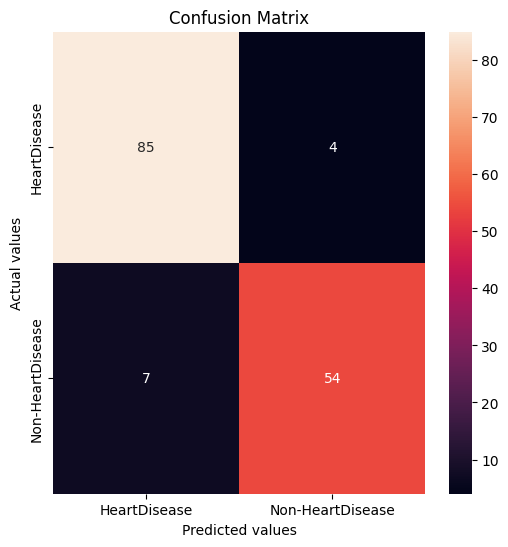

In [32]:
#using Matplotlib and Seaborn to plot

import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df_cm,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [33]:
#using metrics to get precision

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                  precision    recall  f1-score   support

    HeartDisease       0.92      0.96      0.94        89
Non-HeartDisease       0.93      0.89      0.91        61

        accuracy                           0.93       150
       macro avg       0.93      0.92      0.92       150
    weighted avg       0.93      0.93      0.93       150



[Text(0.4308510638297872, 0.9615384615384616, 'QuantumPatternFeature <= 8.47\ngini = 0.479\nsamples = 350\nvalue = [211, 139]'),
 Text(0.2553191489361702, 0.8846153846153846, 'Cholesterol <= 296.5\ngini = 0.031\nsamples = 193\nvalue = [190, 3]'),
 Text(0.34308510638297873, 0.9230769230769231, 'True  '),
 Text(0.2127659574468085, 0.8076923076923077, 'QuantumPatternFeature <= 8.43\ngini = 0.021\nsamples = 192\nvalue = [190, 2]'),
 Text(0.1276595744680851, 0.7307692307692307, 'Age <= 34.5\ngini = 0.011\nsamples = 187\nvalue = [186.0, 1.0]'),
 Text(0.0851063829787234, 0.6538461538461539, 'Age <= 33.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.0425531914893617, 0.5769230769230769, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.1276595744680851, 0.5769230769230769, 'Cholesterol <= 179.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.0851063829787234, 0.5, 'Cholesterol <= 165.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0425531914893617, 0.4230769230769231, 

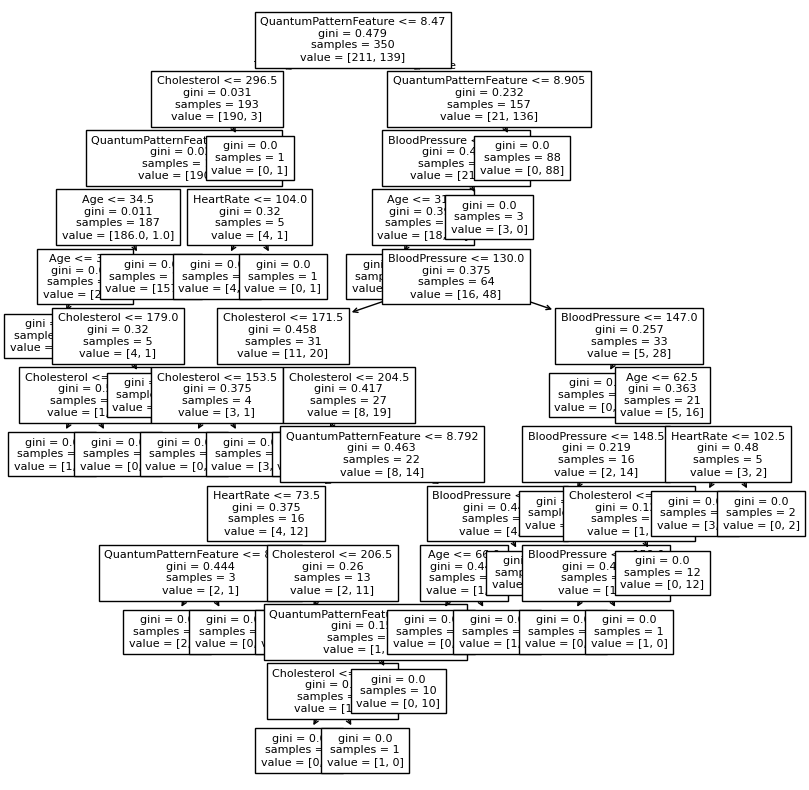

In [37]:
#Decision Tree Visualisation

features= ['Age','BloodPressure','Cholesterol','HeartRate','QuantumPatternFeature']
target= ['HeartStatus']
plt.figure(figsize=(10,10))
tree.plot_tree(dtree, feature_names=features,fontsize=8)